import libraries and read data

In [53]:
!pip uninstall eodal -y
!pip install git+https://github.com/lukasValentin/eodal.git@landsat-dev

Found existing installation: eodal 0.2.1
Uninstalling eodal-0.2.1:
  Successfully uninstalled eodal-0.2.1
  Cloning https://github.com/lukasValentin/eodal.git (to revision landsat-dev) to c:\users\ftimcke\appdata\local\temp\pip-req-build-111gpbzy
  Resolved https://github.com/lukasValentin/eodal.git to commit 8b2fce3ddcf95ab6c76a8b928bd5534f57569548
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for eodal: filename=eodal-0.2.1-py3-none-any.whl size=190148 sha256=8b2c9e85ea6edf9b4727d0ee223a20243c0399218ee24fd301a6c793960a3226
  Stored in directory: C:\Users\ftimcke\AppData\Local\Temp\pip-ephem-wheel-cache-1ix88lf5\wheels\a3\75\82\ed5767b22b248addfa7c117f513917c6a390ee5e864fbdb103
Successfully

  Running command git clone --filter=blob:none --quiet https://github.com/lukasValentin/eodal.git 'C:\Users\ftimcke\AppData\Local\Temp\pip-req-build-111gpbzy'
  Running command git checkout -b landsat-dev --track origin/landsat-dev
  branch 'landsat-dev' set up to track 'origin/landsat-dev'.
  Switched to a new branch 'landsat-dev'


In [54]:
#import what is needed
from datetime import datetime
from pathlib import Path
from shapely.geometry import box

from eodal.config import get_settings
from eodal.core.sensors import Landsat
from eodal.core.scene import SceneCollection
from eodal.mapper.feature import Feature

In [62]:
# read data from pickled file object into SceneCollectio
fpath = Path('S:\MSc_23_TimckeFinn\data\EOdal\sample_mapper_data.pkl')
scoll = SceneCollection.from_pickle(stream=fpath)
scoll

EOdal SceneCollection
----------------------
# Scenes:    1
Timestamps:    2023-05-14 00:00:00
Scene Identifiers:    LC09_L2SP_173060_20230514_20230517_02_T1

delete no data

In [63]:
for scene_id, scene in scoll:
    print(scene.band_aliases)
    print(scene.band_names)

['B4', 'B3', 'B2', 'qa_pixel', 'qa_aerosol', 'qa_radsat', 'qa']
['red', 'green', 'blue', 'qa_pixel', 'qa_aerosol', 'qa_radsat', 'qa']


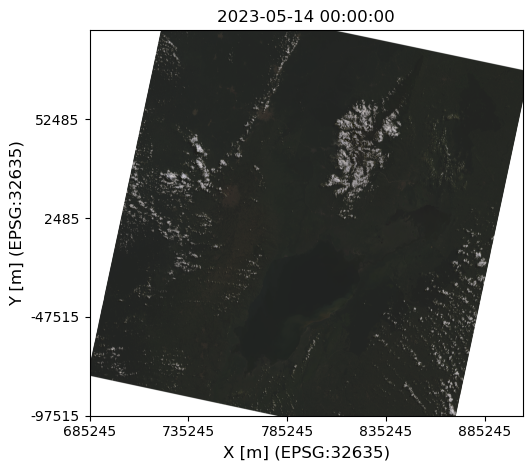

In [64]:
%matplotlib inline  

# the scenes can be plotted
f_scenes = scoll.plot(['red', 'green', 'blue'])

Get values

In [86]:
import numpy as np
import pandas as pd

# Specify the fill value
fill_value = -999

# Create a masked array
for scene_id, scene in scoll:
   
   masked_array = scene.get_values()

   # Convert masked array to a normal NumPy array with fill value
   normal_array = masked_array.filled(fill_value)


print(normal_array.shape)

(7, 6501, 7308)


In [87]:
new_shape = (normal_array.shape[1] * normal_array.shape[2], normal_array.shape[0])
print (normal_array.shape)

print (new_shape)


X = normal_array[:, :, :].reshape(new_shape)

print (X.shape)

(7, 6501, 7308)
(47509308, 7)
(47509308, 7)
